In [157]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
dataset = pd.read_csv("C:/Users/simplon/Documents/Manipulation_Librairie_Marianne/dataset_manipulation_librairie.csv")
dataset

,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,c_1,67,m,300.65,15,20.043333,"(50, 100]",174.20,71.58,54.87,27.0
1,c_10,66,m,586.18,16,36.636250,"(50, 100]",124.92,391.27,69.99,76.0
2,c_100,30,m,222.87,3,74.290000,"(25, 35]",31.38,52.96,138.53,202.0
3,c_1000,56,f,980.02,42,23.333810,"(50, 100]",169.85,810.17,0.00,0.0
4,c_1001,40,m,1102.45,24,45.935417,"(35, 50]",527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,67,m,119.08,5,23.816000,"(50, 100]",55.34,63.74,0.00,116.0
8596,c_996,52,f,739.60,36,20.544444,"(50, 100]",204.70,534.90,0.00,22.0
8597,c_997,28,f,572.89,10,57.289000,"(25, 35]",84.86,158.92,329.11,54.0
8598,c_998,21,m,1527.69,13,117.514615,"(18, 25]",88.17,108.06,1331.46,5.0


In [159]:
data_num = dataset.drop(columns=['client_id', "sex", "tranche_age"])
data_num

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,67,300.65,15,20.043333,174.20,71.58,54.87,27.0
1,66,586.18,16,36.636250,124.92,391.27,69.99,76.0
2,30,222.87,3,74.290000,31.38,52.96,138.53,202.0
3,56,980.02,42,23.333810,169.85,810.17,0.00,0.0
4,40,1102.45,24,45.935417,527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...
8595,67,119.08,5,23.816000,55.34,63.74,0.00,116.0
8596,52,739.60,36,20.544444,204.70,534.90,0.00,22.0
8597,28,572.89,10,57.289000,84.86,158.92,329.11,54.0
8598,21,1527.69,13,117.514615,88.17,108.06,1331.46,5.0


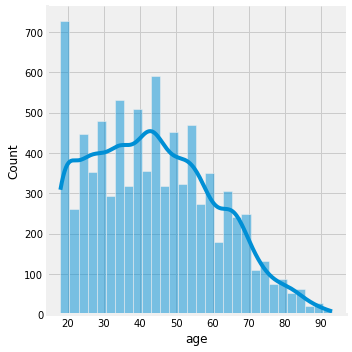

In [160]:
sns.displot(data_num.age, kde=True)



In [161]:
from sklearn.preprocessing import StandardScaler


# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_num)

scaled_features_df = pd.DataFrame(scaled, index=data_num.index, columns=data_num.columns)
scaled_features_df



,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,1.375740,-0.145524,-0.065034,-0.886085,-0.067417,-0.224196,-0.071303,-0.102653
1,1.316596,-0.034237,-0.051112,-0.153254,-0.106470,0.153541,-0.060364,0.983415
2,-0.812603,-0.175839,-0.232100,1.509736,-0.180599,-0.246197,-0.010777,3.776163
3,0.725152,0.119265,0.310864,-0.740760,-0.070864,0.648503,-0.110999,-0.701099
4,-0.221159,0.166983,0.060265,0.257447,0.212814,0.015734,0.106041,-0.656770
...,...,...,...,...,...,...,...,...
8595,1.375740,-0.216292,-0.204256,-0.719464,-0.161611,-0.233460,-0.110999,1.870002
8596,0.488574,0.025560,0.227331,-0.863953,-0.043246,0.323251,-0.110999,-0.213477
8597,-0.930892,-0.039416,-0.134645,0.758881,-0.138217,-0.120998,0.127101,0.495793
8598,-1.344902,0.332724,-0.092879,3.418764,-0.135594,-0.181093,0.852269,-0.590276


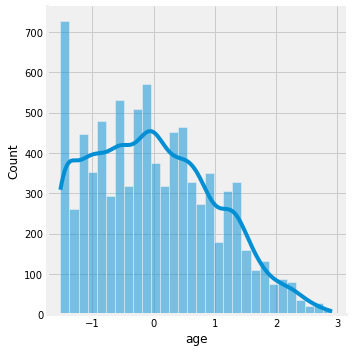

In [162]:
sns.displot(scaled_features_df.age, kde=True)


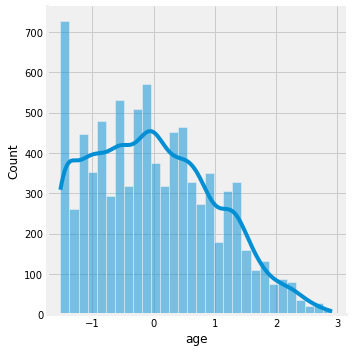

In [163]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_num)

scaled_features_df = pd.DataFrame(scaled, index=data_num.index, columns=data_num.columns)
scaled_features_df

#sns.displot(data=scaled_features_df, x="age", kind="kde")
sns.displot(scaled_features_df.age, kde=True)



In [164]:
#correlation , visualisation hitmap
corr_df = data_num.corr(method='pearson')
corr_df

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
age,1.000000,-0.039311,0.034473,-0.635116,0.001871,0.071732,-0.118598,-0.112045
montant,-0.039311,1.000000,0.908031,0.031288,0.763028,0.872090,0.625651,-0.082970
frequence,0.034473,0.908031,1.000000,-0.070662,0.903133,0.944583,0.282648,-0.100710
panier_moyen,-0.635116,0.031288,-0.070662,1.000000,-0.069433,-0.073368,0.166384,0.150940
montant_categ_0,0.001871,0.763028,0.903133,-0.069433,1.000000,0.818031,0.002548,-0.082658
montant_categ_1,0.071732,0.872090,0.944583,-0.073368,0.818031,1.000000,0.259693,-0.109184
montant_categ_2,-0.118598,0.625651,0.282648,0.166384,0.002548,0.259693,1.000000,-0.011697
recence,-0.112045,-0.082970,-0.100710,0.150940,-0.082658,-0.109184,-0.011697,1.000000


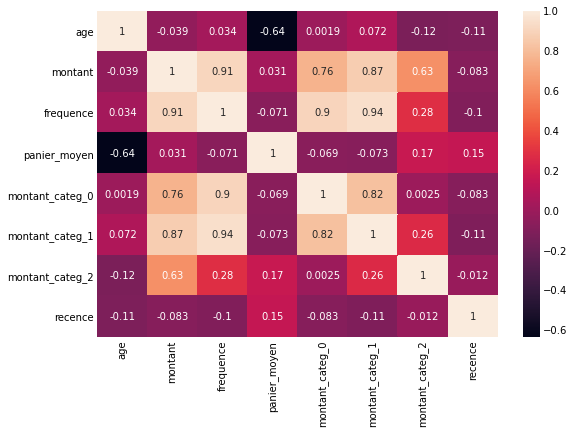

In [165]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()



In [166]:
data_cluster = scaled_features_df.drop(columns=["frequence", "montant_categ_1",])
data_cluster

,age,montant,panier_moyen,montant_categ_0,montant_categ_2,recence
0,1.375740,-0.145524,-0.886085,-0.067417,-0.071303,-0.102653
1,1.316596,-0.034237,-0.153254,-0.106470,-0.060364,0.983415
2,-0.812603,-0.175839,1.509736,-0.180599,-0.010777,3.776163
3,0.725152,0.119265,-0.740760,-0.070864,-0.110999,-0.701099
4,-0.221159,0.166983,0.257447,0.212814,0.106041,-0.656770
...,...,...,...,...,...,...
8595,1.375740,-0.216292,-0.719464,-0.161611,-0.110999,1.870002
8596,0.488574,0.025560,-0.863953,-0.043246,-0.110999,-0.213477
8597,-0.930892,-0.039416,0.758881,-0.138217,0.127101,0.495793
8598,-1.344902,0.332724,3.418764,-0.135594,0.852269,-0.590276


In [167]:
distorsions= []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_cluster)
    distorsions.append(kmeans.inertia_)
distorsions

[51599.99999999979,
 37259.05800330451,
 28804.022578651886,
 18158.74110097145,
 13735.913287969155,
 10632.87819217159,
 8853.179050977551,
 7884.176004677047,
 6761.184192296468,
 6173.98439832263,
 5615.871412061923,
 5180.7092751100945,
 4857.862425060443,
 4539.221871875667]

Text(0, 0.5, 'distorsions')

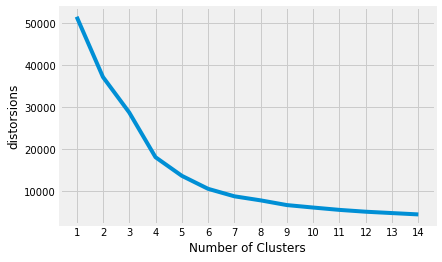

In [168]:
plt.plot(range(1, 15), distorsions)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("distorsions")

In [169]:
model = KMeans(n_clusters=5)
model.fit(data_cluster)
model.predict(data_cluster)

array([0, 0, 4, ..., 3, 3, 0])

In [170]:
from sklearn.metrics import silhouette_score

cluster_coeff = silhouette_score(data_cluster, label, metric='euclidean')
cluster_coeff
# score = metrics.silhouette_score(data_cluster, model.labels,metric = "euclidean" )
# score

0.9794142614143402

In [171]:
# plt.scatter(data_cluster['age'], data_cluster["panier_moyen"], c=data_cluster["cluster"], cmap= plt.cm.Set1)
data_cluster["cluster"]=model.predict(data_cluster)
